# Importing neccessry liabrary

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf 

In [54]:
df_cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
df_cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [55]:
df_cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [56]:
df_cocacola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

<AxesSubplot:>

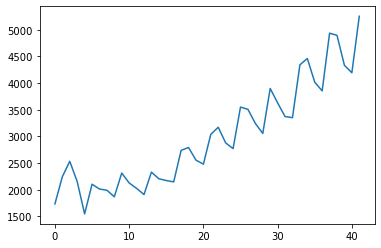

In [57]:
df_cocacola.Sales.plot()

In [58]:
quarter = ['Q1','Q2','Q3','Q4']
n = df_cocacola['Quarter'][0]
n[0:2]

'Q1'

In [59]:
df_cocacola['quarter'] = 0

for i in range(42):
    n = df_cocacola['Quarter'][i]
    df_cocacola['quarter'][i] = n[0:2]
    
df_cocacola.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11852\1612418763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cocacola['quarter'][i] = n[0:2]


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


####  4 dummy variables will be created as there is 4 unique categories in column 'quarter', 4 new columns for each unique quarter

In [60]:
dummy = pd.DataFrame(pd.get_dummies(df_cocacola['quarter']))
df_cocacola1 = pd.concat((df_cocacola, dummy), axis=1)

df_cocacola1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [61]:
t = np.arange(1, 43)
df_cocacola1['t'] = t
df_cocacola1['t_squared'] = df_cocacola1['t']*df_cocacola1['t']
df_cocacola1['log_sales'] = np.log(df_cocacola1['Sales'])

df_cocacola1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='quarter', ylabel='Sales'>

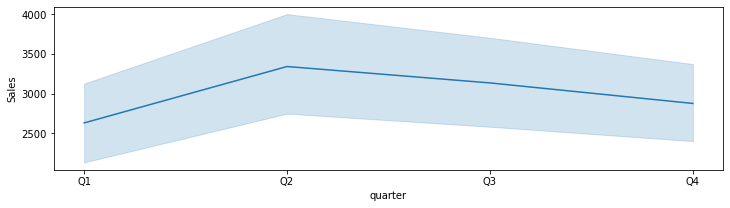

In [62]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter", y="Sales", data=df_cocacola1)

### Time plot

<AxesSubplot:>

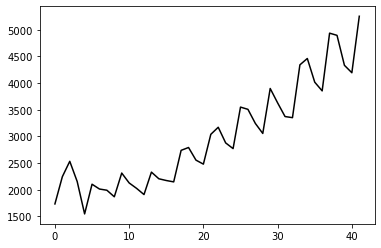

In [63]:
df_cocacola1.Sales.plot(style="k")

# Model Building

### Split the data into Train and Test

In [64]:
Train = df_cocacola1.head(38)
Test = df_cocacola1.tail(4)
Test = Test.set_index(np.arange(1,5))

### Linear model

In [65]:
linear_model = smf.ols('Sales~t', data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))

rmse_linear

591.5532957223963

### Quadratic model

In [66]:
Quad = smf.ols('Sales~t+t_squared', data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))

rmse_Quad

475.56183518315095

### # Exponential model

In [67]:
Exp = smf.ols('log_sales~t', data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))

rmse_Exp

466.24797310672346

### Additive seasonality model

In [68]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))

rmse_add_sea

1860.0238154547283

### Additive seasonality with linear

In [69]:
add_lin_sea = smf.ols("Sales~Q1+Q2+Q3+Q4+t", data=Train).fit()
pred_add_lin_sea = pd.Series(add_lin_sea.predict(pd.DataFrame(Test[["Q1","Q2","Q3","Q4","t"]])))
rmse_add_lin_sea = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_add_lin_sea))**2))

rmse_add_lin_sea

464.9829023982245

### Additive with Quadratic

In [70]:
add_quad = smf.ols("Sales~Q1+Q2+Q3+Q4+t+t_squared", data=Train).fit()
pred_add_quad = pd.Series(add_quad.predict(pd.DataFrame(Test[["Q1","Q2","Q3","Q4","t","t_squared"]])))
rmse_add_quad = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_add_quad))**2))

rmse_add_quad

301.7380071935364

### Multiplicative

In [71]:
mul = smf.ols("log_sales~Q1+Q2+Q3+Q4", data=Train).fit()
pred_mul = pd.Series(mul.predict(pd.DataFrame(Test[["Q1","Q2","Q3","Q4"]])))
rmse_mul = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(np.exp(pred_mul)))**2))

rmse_mul

1963.3896400779709

### Multiplicative linear

In [72]:
mul_lin = smf.ols("log_sales~Q1+Q2+Q3+Q4+t", data=Train).fit()
pred_mul_lin = pd.Series(mul_lin.predict(pd.DataFrame(Test[["Q1","Q2","Q3","Q4","t"]])))
rmse_mul_lin = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(np.exp(pred_mul_lin)))**2))

rmse_mul_lin

225.52439049827484

### Multiplicative linear Quadratic

In [73]:
mul_lin_quad = smf.ols("log_sales~Q1+Q2+Q3+Q4+t+t_squared", data=Train).fit()
pred_mul_lin_quad = pd.Series(mul_lin_quad.predict(pd.DataFrame(Test[["Q1","Q2","Q3","Q4","t","t_squared"]])))
rmse_mul_lin_quad = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(np.exp(pred_mul_lin_quad)))**2))

rmse_mul_lin_quad

581.8457187971713

# RMSE Values for every model created

In [74]:
# Table of RMSE values

RMSE_Table = {"Model":pd.Series(['rmse_mul_lin_quad', 'rmse_mul_lin', 'rmse_mul', 'rmse_add_quad', 'rmse_add_lin_sea', 
                                 'rmse_add_sea', 'rmse_Exp', 'rmse_Quad', 'rmse_linear']), "RMSE_Values":pd.Series(
                                [rmse_mul_lin_quad, rmse_mul_lin, rmse_mul, rmse_add_quad, rmse_add_lin_sea, rmse_add_sea, 
                                 rmse_Exp, rmse_Quad, rmse_linear])}


RMSE_Table = pd.DataFrame(RMSE_Table)
RMSE_Table.sort_values(['RMSE_Values'])

,Model,RMSE_Values
1,rmse_mul_lin,225.524390
3,rmse_add_quad,301.738007
4,rmse_add_lin_sea,464.982902
6,rmse_Exp,466.247973
7,rmse_Quad,475.561835
0,rmse_mul_lin_quad,581.845719
8,rmse_linear,591.553296
5,rmse_add_sea,1860.023815
2,rmse_mul,1963.389640


#### From RMSE table, 'Multiplicative with lenear trend model' has the least value of RMSE among the models prepared

In [75]:
# Build the final model on entire data set

Final_mul_lin_model = smf.ols("log_sales~Q1+Q2+Q3+Q4+t", data=df_cocacola1).fit()